<a href="https://colab.research.google.com/github/cibelemoraes/projeto-M-tricas-de-Avalia-o-de-Aprendizado/blob/main/m%C3%A9tricas_modelo_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##KNN para Classificação
Importando as bibliotecas necessárias

In [2]:

import pandas as pd #manipulação de dataset
from sklearn.preprocessing import LabelEncoder #pré-processamento
from sklearn.preprocessing import MinMaxScaler #padronização
from sklearn.neighbors import KNeighborsClassifier #classificador
from sklearn.model_selection import train_test_split #separando em dados teste e treinamento
from sklearn.metrics import classification_report # metricas de validação
from sklearn.metrics import accuracy_score #acuracia
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score #recall
from sklearn.metrics import f1_score #f1-score
from sklearn.metrics import roc_auc_score #area sob curva roc
from sklearn.metrics import roc_curve #curva roc
from sklearn.metrics import confusion_matrix #matriz de confusão
from matplotlib import pyplot #grafico

##Importando o conjunto de dados do Github

In [3]:
url = 'https://raw.githubusercontent.com/scudilio/classification_metrics/master/dataset_Social_Network_Ads.csv'
data = pd.read_csv(url)
data.head(5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


##Porcentagem de clientes que compraram o anúncio

In [4]:
data['Purchased'].sum()/data['Purchased'].count()

0.3575

##Separando a variável dependente das variáveis independentes
Para exemplificar e simplificar o problema iremos utilizar apenas as variáveis numéricas.

In [5]:
#Criando variaveis independentes e dependentes
#utilizaremos apenas as variáveis numéricas

y = data['Purchased']
X = data.iloc[ :, [2,3]].values

##Pré-Processamento Básico Padronizando as Variáveis Contínuas


In [6]:

X = MinMaxScaler().fit_transform(X)

#Separando o dados em Treino e Teste

In [9]:
x_treino, x_teste, y_treino,y_teste  = train_test_split(X, y, test_size = 0.25,random_state = 1)

##Ajustando o KNN nos dados de **Treino**

In [10]:

knn = KNeighborsClassifier()
knn.fit(x_treino, y_treino)


KNeighborsClassifier()

In [11]:
print(knn)


KNeighborsClassifier()


##Calculando a Matriz de Confusão nos dados de Teste

In [12]:
#Calculando a matriz de confusão
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))


Predito   0   1  All
Real                
0        50   8   58
1         4  38   42
All      54  46  100


##Calculando as métricas de validação
**Acurácia**

In [13]:

# Acurácia
acuracia = accuracy_score(y_teste, resultado_knn)
print('Acurácia: %f' % acuracia)


Acurácia: 0.880000


In [14]:

50/58

0.8620689655172413

**Precision**

In [15]:
# Precision
precision = precision_score(y_teste, resultado_knn)
print('Precision: %f' % precision)


Precision: 0.826087


**Recall**

In [16]:
# Recall
recall = recall_score(y_teste, resultado_knn)
print('Recall: %f' % recall)

Recall: 0.904762


F1-**Score**

In [17]:

# F1-Score
f1 = f1_score(y_teste, resultado_knn)
print('F1-Score: %f' % f1)

F1-Score: 0.863636


**Analisando as métricas de acordo com as classes**

In [18]:
print(classification_report(y_teste, resultado_knn))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        58
           1       0.83      0.90      0.86        42

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



**Área Sob a Curva Roc - AUC**

In [19]:
# calculate AUC
auc = roc_auc_score(y_teste, resultado_knn)
print('AUC: %.3f' % auc)


AUC: 0.883


**Gráfico da Curva Roc**

In [20]:

# estimando as probabilidades
knn_prob = knn.predict_proba(x_teste)
probs = knn_prob[:, 1]
rfp, rvp,lim = roc_curve(y_teste, probs)


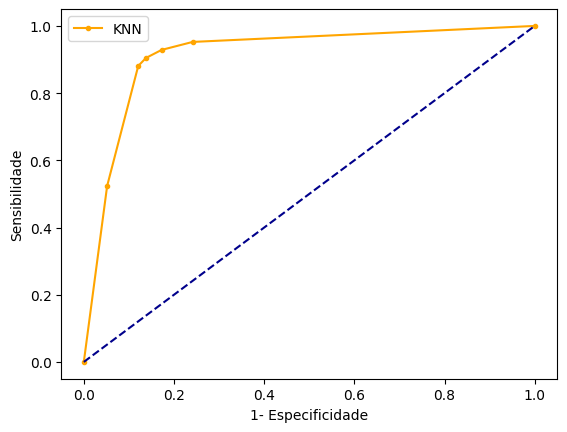

AUC-ROC : 0.883415435139573


In [21]:
# gráfico da curva roc
pyplot.plot(rfp, rvp, marker='.', label='KNN',color="orange")
pyplot.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

# axis labels
pyplot.xlabel('1- Especificidade')
pyplot.ylabel('Sensibilidade')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print("AUC-ROC :",auc)